In [2]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

In [1]:
import os, shutil

original_dataset_dir = 'C:/Users/kamar/OneDrive/Desktop/cats_and_dogs' #path in which you saved the dataset

base_dir = 'C:/Users/kamar/OneDrive/Desktop/cats_and_dogs_small' #path in which you want to create train test split 
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

Using TensorFlow backend.


In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from keras import models
from keras import layers
from keras import optimizers

In [7]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [8]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [9]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])

history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
100/100 [==============================] - 210s 2s/step - loss: 0.5360 - acc: 0.7210 - val_loss: 0.1845 - val_acc: 0.8290
Epoch 2/100
100/100 [==============================] - 210s 2s/step - loss: 0.3812 - acc: 0.8265 - val_loss: 0.1709 - val_acc: 0.8930
Epoch 3/100
100/100 [==============================] - 214s 2s/step - loss: 0.3063 - acc: 0.8780 - val_loss: 0.2744 - val_acc: 0.9120
Epoch 4/100
100/100 [==============================] - 214s 2s/step - loss: 0.3009 - acc: 0.8670 - val_loss: 0.1948 - val_acc: 0.9110
Epoch 5/100
100/100 [==============================] - 213s 2s/step - loss: 0.2569 - acc: 0.8865 - val_loss: 0.3729 - val_acc: 0.9160
Epoch 6/100
100/100 [==============================] - 215s 2s/step - loss: 0.2554 - acc: 0.8935 - val_loss: 0.1283 - val_acc: 0.9190
Epoch 7/100
100/100 [==============================] - 233s 2s/step - loss: 0.2325 - acc: 0.9015 - va

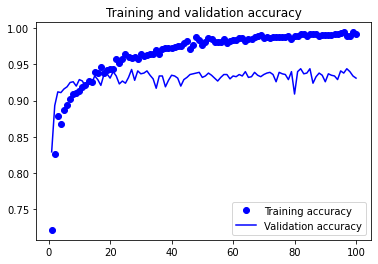

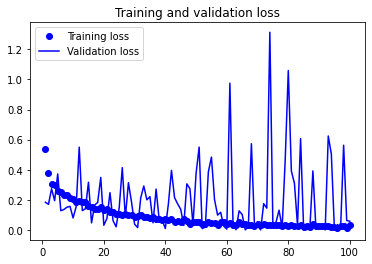

"\ndef smooth_curve(points, factor=0.8):\n    smoothed_points = []\n    for point in points:\n        if smoothed_points:\n            previous = smoothed_points[-1]\n            smoothed_points.append(previous * factor + point * (1 - factor))\n        else:\n            smoothed_points.append(point)\n        return smoothed_points\n    \nimport matplotlib.pyplot as plt\nplt.plot(100,smooth_curve('accuracy'), 'bo', label='Smoothed training acc')\nplt.plot(100,smooth_curve('val_accuracy'), 'b', label='Smoothed validation acc')\nplt.title('Training and validation accuracy')\nplt.legend()\nplt.figure()\nplt.plot(100,smooth_curve('loss'), 'bo', label='Smoothed training loss')\nplt.plot(100,smooth_curve('val_loss'), 'b', label='Smoothed validation loss')\nplt.title('Training and validation loss')\nplt.legend()\nplt.show()\n"

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
